In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

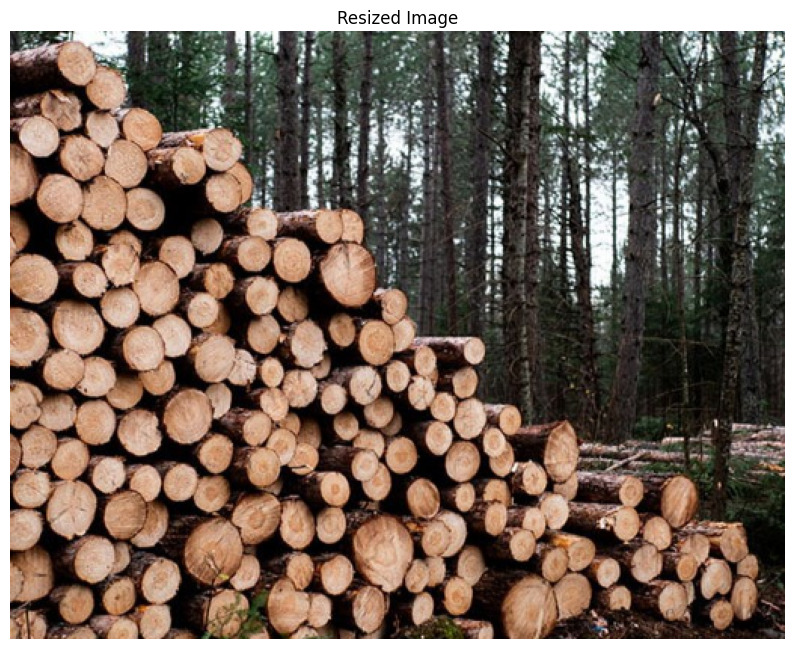

New height: 403, Width: 514


In [2]:
def display_image(ax, image, title='Image', cmap=None):
    """Helper function to display images in matplotlib."""
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
 
# Load image
image_path = r"D:\MyProject\CV\CV2\logs-4.jpg"
image = cv.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image at {image_path} not found.")
 
# Convert BGR to RGB and resize
src = cv.cvtColor(image, cv.COLOR_BGR2RGB)
height, width = src.shape[:2]
new_height = int(height * 0.72)
src = cv.resize(src, (width, new_height), interpolation=cv.INTER_LINEAR)
 
# Display original resized image
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
display_image(ax, src, 'Resized Image')
plt.show()
print(f"New height: {new_height}, Width: {width}")

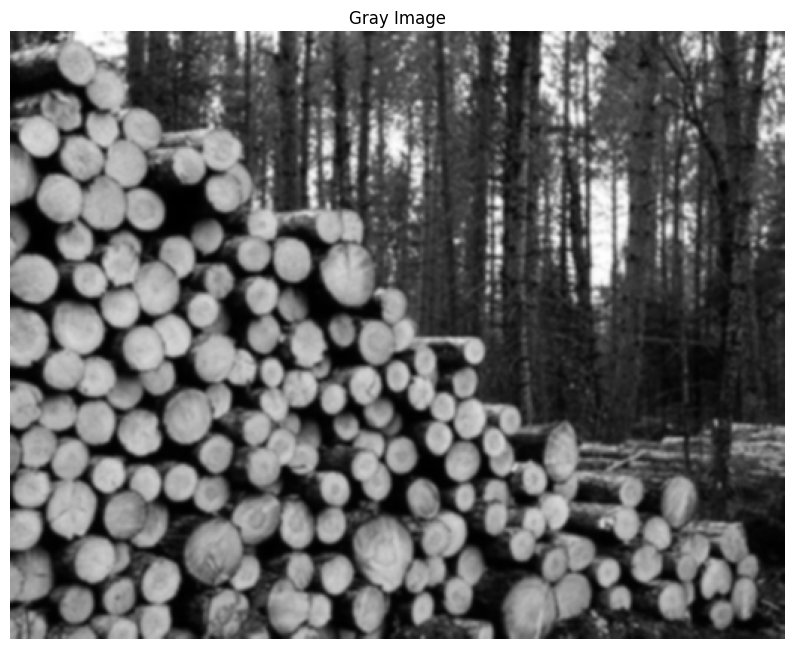

In [3]:
# Convert to grayscale and apply Gaussian blur
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.GaussianBlur(gray, (5, 5), 0)
 
# Display grayscale image
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
display_image(ax, gray, 'Gray Image', cmap='gray')
plt.show()

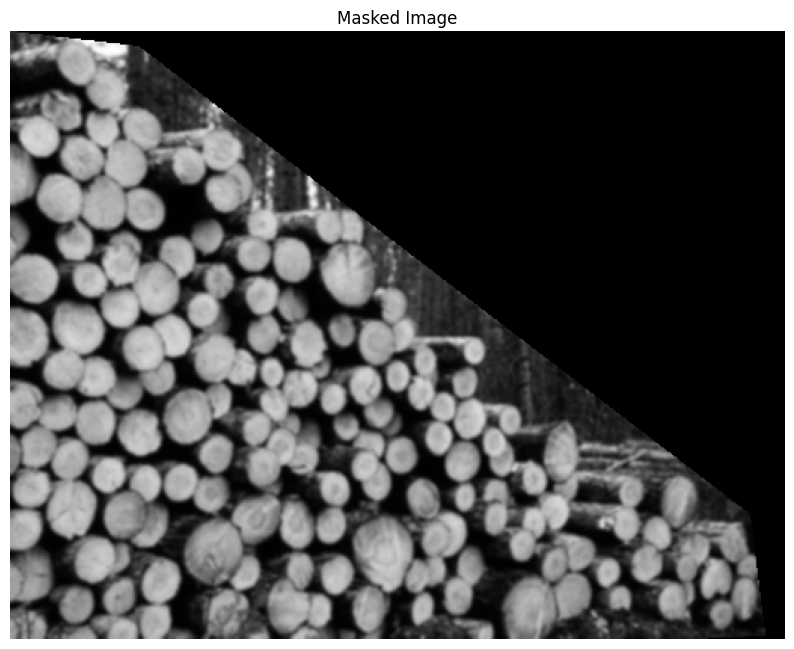

In [4]:
# Define mask vertices
vertices = np.array([[0, 0], [85, 10], [490, 320], [500, 400], [0, 420]], dtype=np.int32)
mask = np.zeros_like(gray)
cv.fillConvexPoly(mask, vertices, 255)
masked = cv.bitwise_and(gray, gray, mask=mask)
 
# Display masked image
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
display_image(ax, masked, 'Masked Image', cmap='gray')
plt.show()

Total pipes:  126


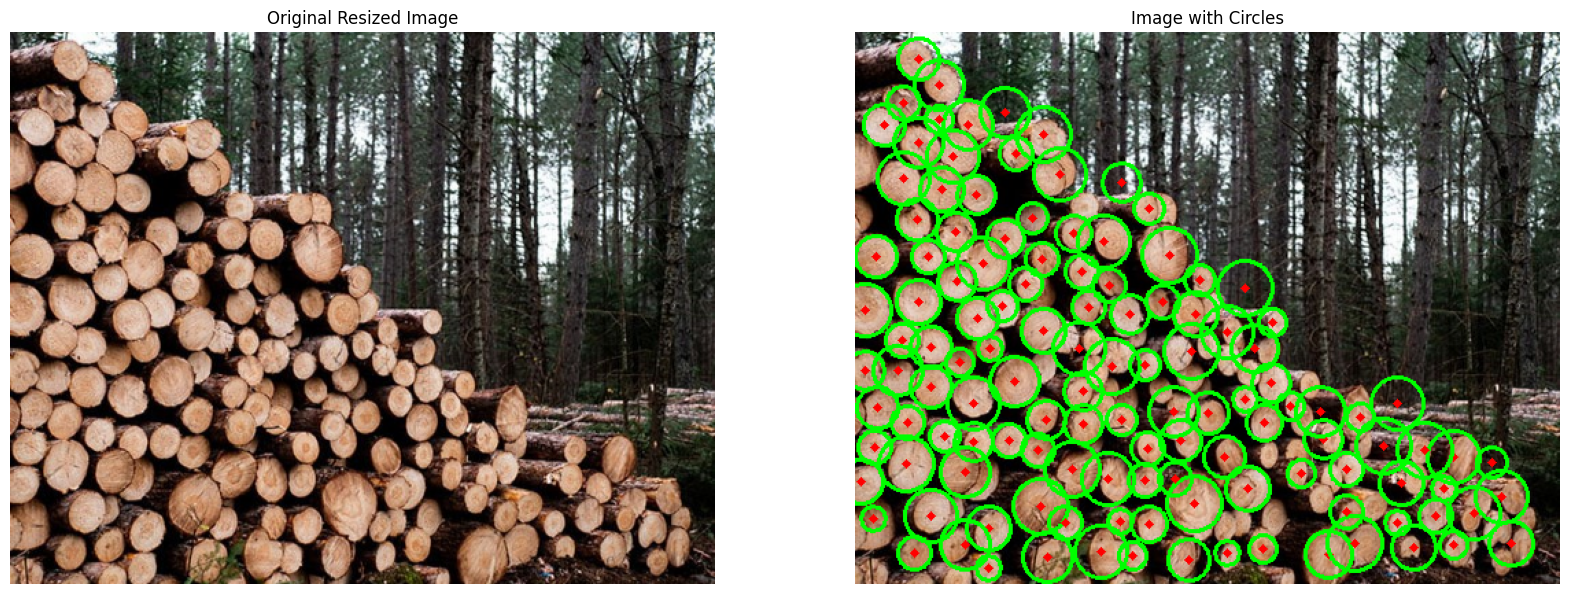

In [5]:
# Detect circles using HoughCircles
detected_circles = cv.HoughCircles(
    masked,
    cv.HOUGH_GRADIENT,
    dp=1.2, # 累加器分辨率与图像分辨率的反比
    minDist=20, # 检测圆心之间的最小距离
    param1=75,  # Canny边缘检测的高阈值
    param2=21,  # 圆心检测阈值，阈值越低，能检测到的圆越多
    minRadius=8, 
    maxRadius=21
)
 
# Draw circles on the original resized image
image_with_circles = src.copy()
pipes_count = 0
 
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for i in range(detected_circles[0].shape[0]):  # 迭代每个检测到的圆
        # 获取圆的x, y坐标和半径
        x, y, radius = detected_circles[0, i, :]
        # 在图像上绘制圆
        cv.circle(image_with_circles, (x, y), radius, (0, 255, 0), 2)
        # 在圆心绘制一个小圆点
        cv.circle(image_with_circles, (x, y), 1, (255, 0, 0), 3)
        pipes_count += 1
 
print("Total pipes: ", pipes_count)
 
# Display final image with circles and original resized image side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
display_image(axs[0], src, 'Original Resized Image')
display_image(axs[1], image_with_circles, 'Image with Circles')
plt.show()